# Lab 5 - Classification : Naive Bayes and Logistic Regression

**Pre Lab Reading: Naive Bayes' and Logistic Regression - 1.5 hrs**
**EE15B085, EE15B109**

# Classification through Hypothesis Testing (Known Distribution)

**Here, the distribution of the data is already known.**

**Consider 2 one-dimensional Gaussian distributions : (1) mean -1 and variance 1 (2) mean 1 and variance 1.** <br> **a)Plot the 2 distributions on the same graph(100 data points each)** <br> **b)plot the likelihood function and the ratio of the likelihood function (a normalized function)**<br>**c) For the points x= -1.5, -0.5, 0, 0.5, 1.5, hypothesize what class they belong to.** <br> **d) Plot rough decision regions for this task. **<br>**e)For a Bayesian setup with equal probability of the hypothesis, compute the error in the estimate (as a function of x).**


**(5 points)**

**Estimated Time: 20 mins**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 1
mu1 = -1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(y, stats.norm.pdf(y, mu1, sigma))

In [2]:
stats.norm.pdf(1, mu, sigma)

0.3989422804014327

In [3]:
ratio = []
for i in range(0,100):
    rat = (stats.norm.pdf(x[i], mu, sigma)/stats.norm.pdf(y[i], mu1, sigma))
    ratio.append(rat)
    

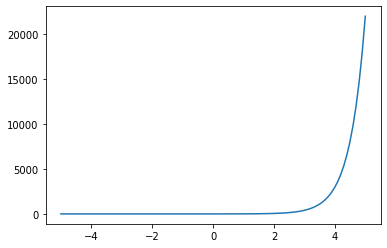

In [4]:
plt.plot(x, ratio)

In [5]:
axis = [-1.5,-0.5,0,0.5,1.5]
ratio_1 = []
for i in range(0,5):
    rat = (stats.norm.pdf(axis[i], mu, sigma)/stats.norm.pdf(axis[i], mu1, sigma))
    ratio_1.append(rat)

In [6]:
ratio_1

[0.049787068367863944,
 0.36787944117144233,
 1.0,
 2.718281828459045,
 20.085536923187668]

x = 1.5, -0.5 belong to class (-1) and x = 0.5, 1.5 belong to class (1). <br>
For x =0, it can't be determined as the ratio is 1

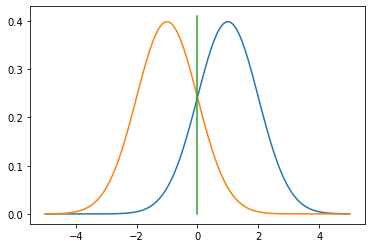

In [7]:
mu = 1
mu1 = -1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(y, stats.norm.pdf(y, mu1, sigma))
plt.plot([0,0],[0,0.41])

# Data Creation (5 points)

**(a) Load data 'Class0.txt' and 'Class1.txt' from the moodle page. Using the random seed to be 40, split it randomly into 75% train and 25% test datapoints.**

**Estimated time : 10 mins**

In [9]:
import numpy as np

np.random.seed(40)

class0 = np.loadtxt('/home/vishnu/Desktop/Sem 7/week5_EE4708/Class0.txt')
class1 = np.loadtxt('/home/vishnu/Desktop/Sem 7/week5_EE4708/Class1.txt')
class_comb = np.concatenate((class0, class1))
import random
random.shuffle(class_comb)
print(len(class_comb))
class_train = class_comb[:1500]
class_test  = class_comb[1500:]

2000


In [11]:
print(len(class_test))


500


# Classification using Nearest Neighbours (10 points)

**Here, the class to which the new data point belongs to is found using the spatially nearest data points.**

**Use the above train data to create a new train data that has the first 500 points from class 0 and first 600 points from class 1. This will provide the data imbalance required for a thorough understanding of this concept. Use below given test points for this exercise.**  

**a)Take the number of nearest neighbours to be 10,100 and 1000. Find the class to which the given test points belong to. Code using numpy only. <br> b)Visualize the test points with respect to the train set data points. Use matplotlib.<br> c) Plot the decision boundary using scikit learn's inbuilt nearest neighbour classifier function.**

**Test Points: -0.999, 0.898, 0.8, 0.85, 0.115, 0.104, -0.112**

**Estimated Time: 20 mins**


In [3]:
class0 = np.expand_dims(class0, axis = 1)
class1 = np.expand_dims(class1, axis = 1)
class0 = np.insert(class0, 1,0,axis =1)
class1 = np.insert(class1, 1,1,axis = 1)

In [10]:
classtrain = np.concatenate((class0[:500], class1[:600]))

In [11]:
classtrain

array([-2.53221215,  0.03489311,  0.35691526, ...,  0.06882677,
        0.73032012,  1.63549442])

In [72]:
trainSet = classtrain
testInstance = [-0.999]
k =100
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors
neighbors = getNeighbors(trainSet, testInstance, k)
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]
response = getResponse(neighbors)
print(response)

0.0


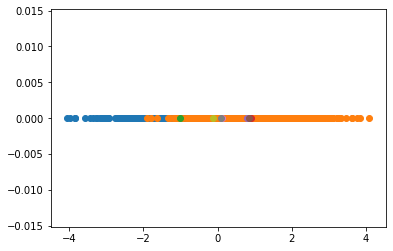

In [97]:

class0 = np.loadtxt('/home/vishnu/Desktop/Sem 7/week5_EE4708/Class0.txt')
class1 = np.loadtxt('/home/vishnu/Desktop/Sem 7/week5_EE4708/Class1.txt')
plt.scatter(class0[:500], [0]*len(class0[:500]))
plt.scatter(class1[:600], [0]*len(class1[:600]))
plt.scatter(-0.999, 0)
plt.scatter(0.898, 0)
plt.scatter(0.8, 0)
plt.scatter(0.85, 0)
plt.scatter(0.115, 0)
plt.scatter(0.104, 0)
plt.scatter(-0.112, 0)



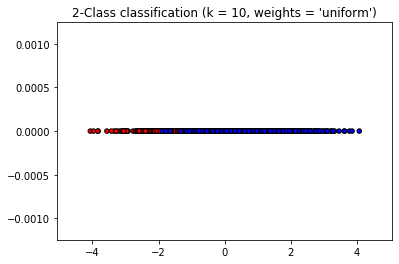

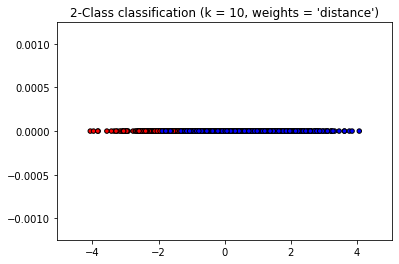

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 10

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = trainclass
y = df[1]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    xx = np.meshgrid(np.arange(x_min, x_max, h))
    xx = np.asarray(xx)
    Z = clf.predict(np.c_[xx.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, [0]*len(xx), Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], [0]*len(X),c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

In [13]:
import pandas as pd 
trainclass = classtrain.reshape(-1,1)
# df = pd.DataFrame(classtrain)
trainclass

array([[-2.53221215],
       [ 0.03489311],
       [ 0.35691526],
       ...,
       [ 0.06882677],
       [ 0.73032012],
       [ 1.63549442]])

# Naive Bayes (Assumed Distribution) (20 points)

**Here, the distribution of the data is assumed using some prior information. Naive Bayes works on the principle of Bayes' theorem. It assumes a prior fit for the dataset and then classifies the data into two or more classes. The prior can take the form of a Gaussian prior or any other valid probability distribution like multinomial or bernoulli.**

**Use above given train and test data for this exercise.**

**a)Assume a Gaussian prior. Use Bayes rule and Naive Bayes algorithm to find a threshold which will serve as the decision boundary. Points on one side of the boundary belong to class 0 and points on the other side of the boundary belong to class 1. Report the estimated threshold.<br> b) Use the threshold to classify the test points into one of the two classes. Report the accuracy. <br> c) How is Naive Bayes different from Nearest Neighbours(based on training done and inference computation time)?<br> d) Plot the decision region using matplotlib.
Estimated Time: 40 mins**

In [25]:
class0 = np.loadtxt('/home/vishnu/Desktop/Sem 7/Data Analytics Lab/week5_EE4708/Class0.txt')
class1 = np.loadtxt('/home/vishnu/Desktop/Sem 7/Data Analytics Lab/week5_EE4708/Class1.txt')
class0 = np.expand_dims(class0, axis = 1)
class1 = np.expand_dims(class1, axis = 1)
class0 = np.insert(class0, 1,0,axis =1)
class1 = np.insert(class1, 1,1,axis = 1)
class_comb = np.concatenate((class0, class1))
import random
random.shuffle(class_comb)
# print(len(class_comb))
class_train = class_comb[:1500]
class_test  = class_comb[1500:]
# len(class_train)

In [27]:
import pandas as pd
df1 = pd.DataFrame(class_train)
X = df1[0].to_numpy()
X = X.reshape(-1,1)
Y = df1[1]
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
df2 = pd.DataFrame(class_test)
X_test = df2[0].to_numpy()
X_test = X_test.reshape(-1,1)
y_pred = clf.predict(X_test)

In [29]:
df2 = pd.DataFrame(class_test)
y_test = df2[1].to_numpy()
y_test = y_test.reshape(-1,1)

In [66]:
y_pred = y_pred.reshape(-1,1)

In [67]:
clf.score(y_pred, y_test)


0.552

Naive Bayes Model assumes a prior model and trains the model but Nearest neighbours partions the train data into k sets and takes mean of accuracy when trained k-1 seats. The computation time will be lesser in Naive bayes Regression  

 Summarize your findings and results here.

# Logistic Regression (No assumption) (30 points)

**Here, no previous assumption is made about the data's distribution.**

**Estimated Time: 1 hr**

**Use the above given train and test data for this exercise. The y value to which class 0 belongs to can be taken as 0 and the y value to which class 1 belongs to can be taken as 1.**

**(a) Fit a linear regression model to the dataset using sklearn. Report the accuracy. Use the threshold as 0.5 to classify to class 0 or class 1. You will find that linear regression is not apt to solve the problem.**

In [74]:
from sklearn import datasets, linear_model, metrics 
reg = linear_model.LinearRegression() 
reg.fit(X, Y) 
y_pred = reg.predict(X_test)

In [78]:
for i in range(len(y_pred)):
    if y_pred[i] <= 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

In [80]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 


Accuracy Score : 0.552


**(b) Logistic Regression uses the sigmoid function for binary classification. Plot the sigmoid function for the range x : [-100,100]. This exercise will help you understand the shape of the sigmoid function and show its suitability in binary classification problems.**



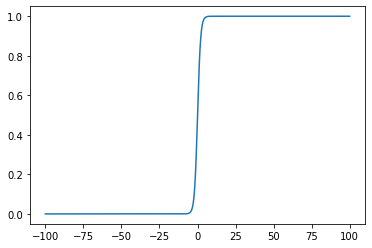

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a
x = np.arange(-100, 100, 0.1)
sig = sigmoid(x)
plt.plot(x,sig)

**(c) Comment on the nature of the graph (specifically : domain,range,behaviour in extreme inputs). This task will give you further insight on the sigmoid function, which will help you while implementing logistic regression.**

The graph value suddenly increases in the range close to zero but at extreme points it kind of dies off and takes a stagnant value. This shows that eihter points stay on top or bottom, very much used for classfication type model 

**(d) Derive and plot the gradients of the sigmoid function for the same range. This is needed for gradient descent in logistic regression.**

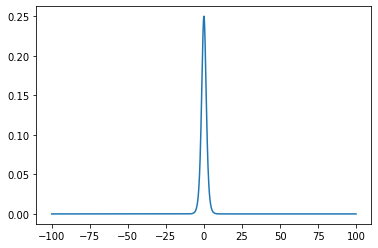

In [22]:
#Derivative for sigmoid curve
def sig(x):
    a = (1/(1+math.exp(-x)))
    return a 
def sigder(x):
    b = []
    for item in x:
        b.append((sig(item)*(1-sig(item))))
    return b
                 
der = sigder(x)
plt.plot(x, sigder(x))

**(e)Again, use the above created train and test set. Implement logistic regression (using only numpy) to predict whether the datapoints belongs to class 0 or 1. Gradient descent also has to be implemented using numpy. Tune the learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 50, 100 and 1000 to arrive at a good solution. Use a random initialization of weight and bias.
<br>Estimated time: 1 hr**


In [44]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))    
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [56]:
model = LogisticRegression(lr=0.1, num_iter=1000)
%time model.fit(X, Y)

CPU times: user 971 ms, sys: 31.7 ms, total: 1 s
Wall time: 506 ms


In [57]:
y_pred = model.predict(X_test, 0.5)

In [62]:
y_pred1 = y_pred.astype(int)

In [65]:
y_pred1 = y_pred1.reshape(-1,1)

In [72]:
def accuracy(y_pred1, y_test):
    count =0
    for i in range(0, len(y_pred1)):
        if y_pred1[i] == y_test[i]:
            count = count +1
    return count

In [73]:
accuracy(y_pred1, y_test)

348

**(f) Plot the decision boundary.**

**(f) What are the advantages of using a Negative Log Likelihood cost function here, as opposed to a least squares cost function in linear regression? (answer should be based on the difference in the tasks and the output functions, convexity of the function).**


Write answer here.

**a)Load LogReg_2d_data.txt and LogReg_2d_labels.txt from moodle. Perform random shuffle and train test split(75:25). Use sklearn to perform logistic regression on the dataset. <br>b)Report the accuracy and F1 score. <br>c)Visualize the decision boundary.**

In [74]:
X = np.loadtxt('/home/vishnu/Desktop/Sem 7/Data Analytics Lab/week5_EE4708/LogReg_2d_data.txt')
y = np.loadtxt('/home/vishnu/Desktop/Sem 7/Data Analytics Lab/week5_EE4708/LogReg_2d_labels.txt')

In [79]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [86]:
X = np.array(X)
y = np.array(y)

In [89]:
y1 = y.reshape(-1,1)

In [99]:
comb = np.column_stack((X,y1))

In [103]:
import random
random.shuffle(comb)

In [125]:
X1 = np.array([x[0:2] for x in comb.tolist()])

In [127]:
y_ = np.array([x[-1] for x in comb.tolist()])

In [129]:
y_ = y_.reshape(-1,1)

In [131]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X1, y_, test_size = 0.25, random_state = 0)

In [134]:
clf = LogisticRegression()
clf.fit(XTrain,yTrain)

/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vishnu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
yPred=clf.predict(XTest)

In [137]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(yTest, yPred)
cnf_matrix

array([[22,  0],
       [ 1,  2]])

In [156]:
from sklearn.metrics import f1_score
f1 = f1_score(yTest, yPred, average='weighted')
f1

0.9564444444444444

In [138]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [148]:
X_1 = np.array([x[0] for x in comb.tolist()])

In [150]:
X_2= np.array([x[1] for x in comb.tolist()])

[(2, 5), Text(0, 0.5, '$X_2$'), (4, 7), Text(0.5, 0, '$X_1$'), None]

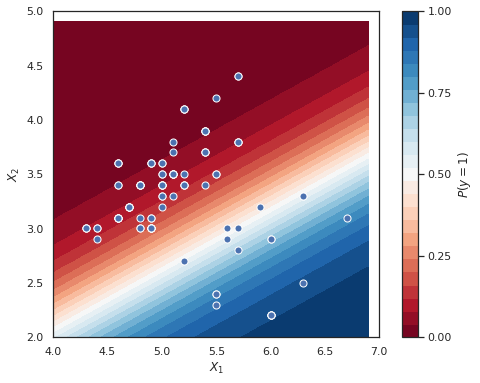

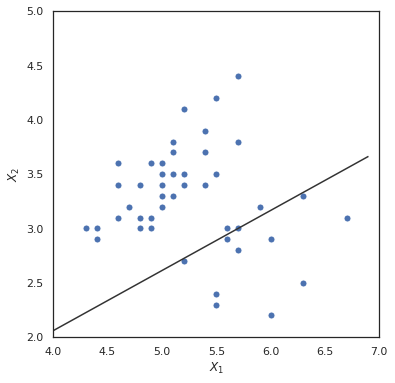

In [155]:
xx, yy = np.mgrid[4:7:.1, 2:5:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X_1, X_2, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(4, 7), ylim=(2, 5),
       xlabel="$X_1$", ylabel="$X_2$")
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X_1, X_2, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(4, 7), ylim=(2, 5),
       xlabel="$X_1$", ylabel="$X_2$")

# The End